In [10]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split


In [11]:
hs=pd.read_csv('headbrain.csv')
hs.head()


,Gender,AgeRange,HeadSize,BrainWeight
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [12]:
hs.columns

Index(['Gender', 'AgeRange', 'HeadSize', 'BrainWeight'], dtype='object')

In [13]:
hs.shape


(237, 4)

In [14]:
hs.dtypes

Gender         int64
AgeRange       int64
HeadSize       int64
BrainWeight    int64
dtype: object

In [15]:
hs.isnull().sum()

Gender         0
AgeRange       0
HeadSize       0
BrainWeight    0
dtype: int64

<AxesSubplot:>

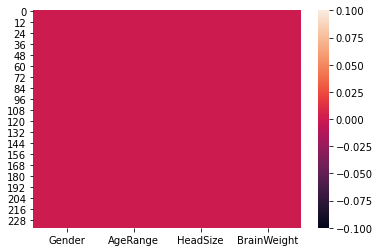

In [16]:
sns.heatmap(hs.isnull())

In [17]:
hs.describe()

,Gender,AgeRange,HeadSize,BrainWeight
count,237.000000,237.000000,237.000000,237.000000
mean,1.434599,1.535865,3633.991561,1282.873418
std,0.496753,0.499768,365.261422,120.340446
min,1.000000,1.000000,2720.000000,955.000000
25%,1.000000,1.000000,3389.000000,1207.000000
50%,1.000000,2.000000,3614.000000,1280.000000
75%,2.000000,2.000000,3876.000000,1350.000000
max,2.000000,2.000000,4747.000000,1635.000000


In [18]:
hs.skew()

Gender         0.265554
AgeRange      -0.144748
HeadSize       0.238807
BrainWeight    0.265478
dtype: float64

<AxesSubplot:>

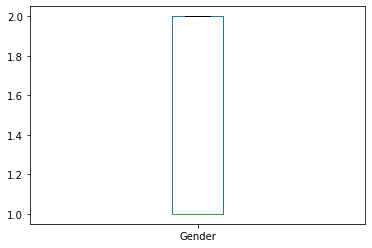

In [19]:
hs['Gender'].plot.box()

<AxesSubplot:>

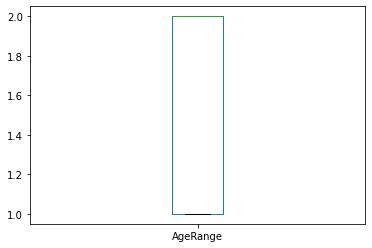

In [20]:
hs['AgeRange'].plot.box()

<AxesSubplot:>

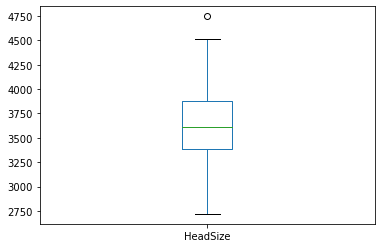

In [21]:
hs['HeadSize'].plot.box()

<AxesSubplot:>

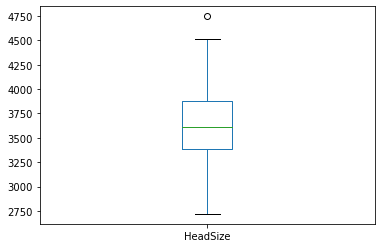

In [22]:
hs['HeadSize'].plot.box()

Gender            AxesSubplot(0.125,0.536818;0.352273x0.343182)
AgeRange       AxesSubplot(0.547727,0.536818;0.352273x0.343182)
HeadSize             AxesSubplot(0.125,0.125;0.352273x0.343182)
BrainWeight       AxesSubplot(0.547727,0.125;0.352273x0.343182)
dtype: object

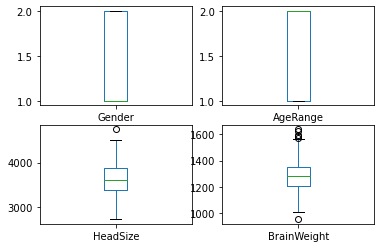

In [23]:
hs.plot(kind='box',subplots=True,layout=(2,2))

In [24]:
#removing outliers
from scipy.stats import zscore
z=np.abs(zscore(hs))
z

array([[0.8767307 , 1.07449777, 2.40886829, 2.0579083 ],
       [0.8767307 , 1.07449777, 0.28535333, 0.11763692],
       [0.8767307 , 1.07449777, 1.72023489, 0.43407603],
       [0.8767307 , 1.07449777, 0.39235214, 0.00727325],
       [0.8767307 , 1.07449777, 1.4897759 , 2.557549  ],
       [0.8767307 , 1.07449777, 0.13441126, 0.14261896],
       [0.8767307 , 1.07449777, 0.41430062, 0.97535345],
       [0.8767307 , 1.07449777, 0.2057438 , 0.23211156],
       [0.8767307 , 1.07449777, 0.05759159, 0.60062293],
       [0.8767307 , 1.07449777, 0.95478182, 0.76716983],
       [0.8767307 , 1.07449777, 0.52399669, 0.47571276],
       [0.8767307 , 1.07449777, 0.98496097, 0.80880656],
       [0.8767307 , 1.07449777, 0.01648451, 0.60062293],
       [0.8767307 , 1.07449777, 1.57482624, 1.99128954],
       [0.8767307 , 1.07449777, 0.54324791, 0.62349678],
       [0.8767307 , 1.07449777, 0.66396452, 1.01699018],
       [0.8767307 , 1.07449777, 0.37584448, 0.62560497],
       [0.8767307 , 1.07449777,

In [1]:
threshold=3
print(np.where(z>3))   # no outliers

NameError: name 'np' is not defined

<AxesSubplot:ylabel='Frequency'>

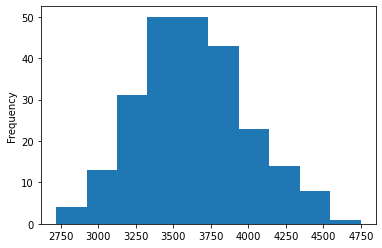

In [26]:
hs['HeadSize'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

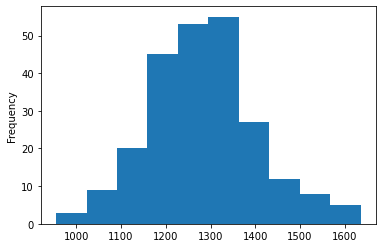

In [27]:
hs['BrainWeight'].plot.hist()

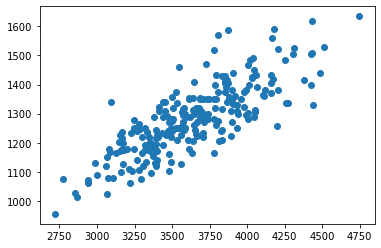

In [28]:
plt.scatter(hs['HeadSize'],hs['BrainWeight'])
plt.show()

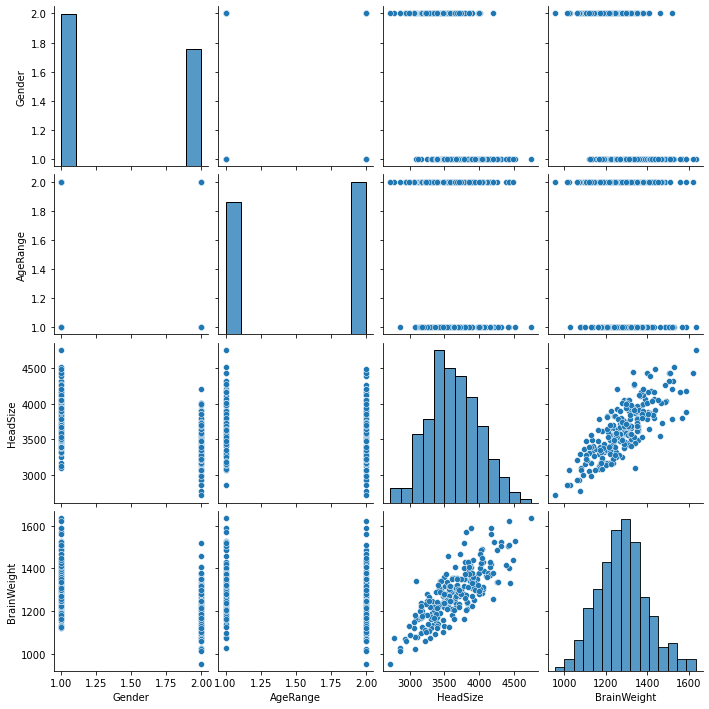

In [29]:
sns.pairplot(hs)

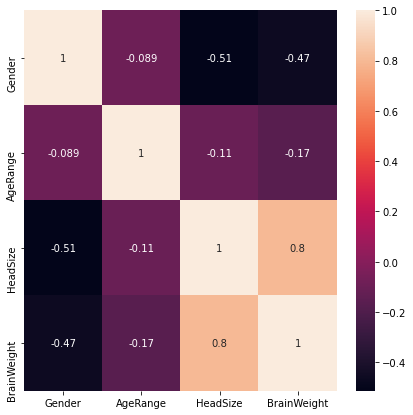

In [30]:
corr_hmap=hs.corr()
plt.figure(figsize=(7,7))
sns.heatmap(corr_hmap,annot=True)
plt.show()

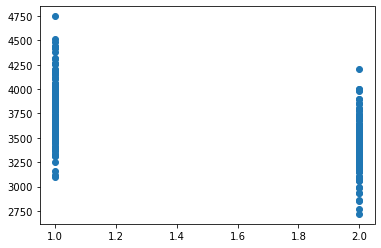

In [31]:
plt.scatter(hs['Gender'],hs['HeadSize'])

In [32]:
y=hs.iloc[:,-1]
y

0      1530
1      1297
2      1335
3      1282
4      1590
       ... 
232    1110
233    1215
234    1104
235    1170
236    1120
Name: BrainWeight, Length: 237, dtype: int64

In [33]:
x=hs.iloc[:,0:-1]    # all rows that is:, 0:-1,take all columns excluding last one
x.head() 

,Gender,AgeRange,HeadSize
0,1,1,4512
1,1,1,3738
2,1,1,4261
3,1,1,3777
4,1,1,4177


In [34]:
x.shape

(237, 3)

In [35]:
y.shape

(237,)

In [125]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)
                                              
                                              


In [126]:
x_train.shape

(158, 3)

In [127]:
y_train.shape

(158,)

In [128]:
x_test.shape

(79, 3)

In [129]:
y_test.shape

(79,)

In [130]:
lm=LinearRegression()



In [131]:
lm.fit(x_train,y_train)   # this will train the model, make y=mx+c line with he input xtrain,ytrain data

LinearRegression()

In [132]:
lm.coef_   # since we have 3 variable is input, this wil find coefficient y=a+bx1+ cx2+ dx3( a is intercept, b,c,d is coeff)

array([-22.27669802, -23.89769671,   0.24864173])

In [133]:
lm.intercept_

445.82065186149305

In [134]:
hs.columns

Index(['Gender', 'AgeRange', 'HeadSize', 'BrainWeight'], dtype='object')

In [135]:
lm.score(x_train,y_train) 

0.636755325029273

In [136]:
pred=lm.predict(x_test)
print("Predicted result",pred)
print("actual",y_test)


Predicted result [1245.74595902 1363.38158635 1243.60924079 1218.89265263 1340.7551893
 1159.34778677 1389.73760928 1065.58176512 1263.64816327 1194.12953736
 1373.17967096 1198.38453772 1341.25247275 1270.21390545 1269.36692297
 1259.44934496 1579.94852952 1271.45711408 1198.50403111 1499.63725209
 1199.3510136  1220.88178644 1255.07485121 1157.33056194 1255.71971908
 1166.03302234 1265.26916196 1477.23140574 1219.63857781 1499.38861036
 1382.99619166 1282.9227245  1186.91892731 1169.1923985  1477.23140574
 1336.99747239 1235.43215487 1116.05603545 1216.90351882 1384.48804201
 1183.58552757 1402.66697903 1269.14637227 1345.20264934 1280.43630724
 1212.30847437 1228.61777096 1152.50531184 1168.2988889  1156.08735331
 1269.716622   1315.36564224 1140.42292458 1353.65646801 1373.42831269
 1243.50818348 1189.68207732 1242.39412319 1329.28957889 1335.38612864
 1316.11156742 1354.65103492 1224.86005405 1160.56290437 1214.16845984
 1029.7773566  1465.04796117 1329.04093716 1152.60636915 1303

In [137]:
print("error")
print("Mean absolute error",mean_absolute_error(y_test,pred))
print("mean square error",mean_squared_error(y_test,pred))

print("root mean squared error",np.sqrt(mean_squared_error(y_test,pred) ))

error
Mean absolute error 55.75643684624973
mean square error 4541.405652073868
root mean squared error 67.38995215960513


In [138]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred))

0.6837096254300141


In [121]:

t1=np.array([1,1,3738])
t.shape

(1, 3)

In [78]:
t1=t.reshape(1,-1)
t1.shape

(1, 3)

In [79]:
lm.predict(t1)


array([1434.50867896])

(3,)

In [82]:
t2=t2.reshape(1,-1)
t2.shape

(1, 3)

In [83]:
lm.predict(t2)

array([1434.50867896])

In [84]:
df=pd.DataFrame(pred)
df.to_csv('brain_size.csv')

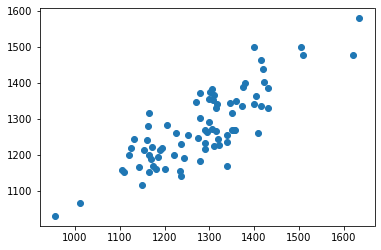

In [139]:
plt.scatter(y_test,pred)
plt.show()